# Draw the Plot of Temporal Variation TE

In [1]:
%pwd

'/mnt/g/D-storage/ESG09_Article/Code'

In [2]:
%cd ..

/mnt/g/D-storage/ESG09_Article


/home/linux/anaconda3/envs/tf/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


## Import Package

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os 
import pandas as pd

## Load Wave Dataset and Plot wave

### Age Difference of Each Wave

In [4]:
YoungTreatedAsYoung = pd.read_parquet(os.path.join('Results', 'PredictionWB_XgbYoungModelYoundPrediction_v1.parquet'))
YoungTreatedAsMiddle = pd.read_parquet(os.path.join('Results', 'PredictionWB_XgbMiddleModelYoungPrediction_v1.parquet'))
YoungTreatedAsOld = pd.read_parquet(os.path.join('Results', 'PredictionWB_XgbOldModelYoungPrediction_v1.parquet'))

MiddleTreatedAsYoung = pd.read_parquet(os.path.join('Results', 'PredictionWB_XgbYoungModelMiddlePrediction_v1.parquet'))
MiddleTreatedAsMiddle = pd.read_parquet(os.path.join('Results', 'PredictionWB_XgbMiddleModelMiddlePrediction_v1.parquet'))
MiddleTreatedAsOld = pd.read_parquet(os.path.join('Results', 'PredictionWB_XgbOldModelMiddlePrediction_v1.parquet'))

OldTreatedAsYoung = pd.read_parquet(os.path.join('Results', 'PredictionWB_XgbYoungModelOldPrediction_v1.parquet'))
OldTreatedAsMiddle = pd.read_parquet(os.path.join('Results', 'PredictionWB_XgbMiddleModelOldPrediction_v1.parquet'))
OldTreatedAsOld = pd.read_parquet(os.path.join('Results', 'PredictionWB_XgbOldModelOldPrediction_v1.parquet'))

In [5]:
Df_Filename = os.path.join("Data", "GallupWB_Ml64var1911k14wave_v1.parquet")
wave_df = pd.read_parquet(Df_Filename)
wave_df = wave_df[['wave']].reset_index()
wave_df['wave'] = wave_df['wave'].astype(int)

In [7]:
YoungTreatedAsYoung_wave = pd.merge(YoungTreatedAsYoung, wave_df, on = 'index')
YoungTreatedAsMiddle_wave = pd.merge(YoungTreatedAsMiddle, wave_df, on = 'index')
YoungTreatedAsOld_wave = pd.merge(YoungTreatedAsOld, wave_df, on = 'index')
MiddleTreatedAsYoung_wave = pd.merge(MiddleTreatedAsYoung, wave_df, on = 'index')
MiddleTreatedAsMiddle_wave = pd.merge(MiddleTreatedAsMiddle, wave_df, on = 'index')
MiddleTreatedAsOld_wave = pd.merge(MiddleTreatedAsOld, wave_df, on = 'index')
OldTreatedAsYoung_wave = pd.merge(OldTreatedAsYoung, wave_df, on = 'index')
OldTreatedAsMiddle_wave = pd.merge(OldTreatedAsMiddle, wave_df, on = 'index')
OldTreatedAsOld_wave = pd.merge(OldTreatedAsOld, wave_df, on = 'index')

In [19]:
wave_level_df = []

for wave in set(wave_df['wave']):
    print(f"Wave: {wave}")
    YoungTreatedAsYoung_wave_select = YoungTreatedAsYoung_wave[YoungTreatedAsYoung_wave['wave']==wave]
    YoungTreatedAsMiddle_wave_select = YoungTreatedAsMiddle_wave[YoungTreatedAsMiddle_wave['wave']==wave]
    YoungTreatedAsOld_wave_select = YoungTreatedAsOld_wave[YoungTreatedAsOld_wave['wave']==wave]
    MiddleTreatedAsYoung_wave_select = MiddleTreatedAsYoung_wave[MiddleTreatedAsYoung_wave['wave']==wave]
    MiddleTreatedAsMiddle_wave_select = MiddleTreatedAsMiddle_wave[MiddleTreatedAsMiddle_wave['wave']==wave]
    MiddleTreatedAsOld_wave_select = MiddleTreatedAsOld_wave[MiddleTreatedAsOld_wave['wave']==wave]
    OldTreatedAsYoung_wave_select = OldTreatedAsYoung_wave[OldTreatedAsYoung_wave['wave']==wave]
    OldTreatedAsMiddle_wave_select = OldTreatedAsMiddle_wave[OldTreatedAsMiddle_wave['wave']==wave]
    OldTreatedAsOld_wave_select = OldTreatedAsOld_wave[OldTreatedAsOld_wave['wave']==wave]
    #line = [wave]

    yy = YoungTreatedAsYoung_wave_select[['index', 'Predict_y']]
    yy.columns = ['index', 'yy']
    
    ym = YoungTreatedAsMiddle_wave_select[['index', 'Predict_y']]
    ym.columns = ['index', 'ym']
    
    yo = YoungTreatedAsOld_wave_select[['index', 'Predict_y']]
    yo.columns = ['index', 'yo']
    
    my = MiddleTreatedAsYoung_wave_select[['index', 'Predict_y']]
    my.columns = ['index', 'my']
    
    mm = MiddleTreatedAsMiddle_wave_select[['index', 'Predict_y']]
    mm.columns = ['index', 'mm']
    
    mo = MiddleTreatedAsOld_wave_select[['index', 'Predict_y']]
    mo.columns = ['index', 'mo']
    
    oy = OldTreatedAsYoung_wave_select[['index', 'Predict_y']]
    oy.columns = ['index', 'oy']
    
    om = OldTreatedAsMiddle_wave_select[['index', 'Predict_y']]
    om.columns = ['index', 'om']
    
    oo = OldTreatedAsOld_wave_select[['index', 'Predict_y']]
    oo.columns = ['index', 'oo']
    
    df = pd.merge(yy, ym, on = 'index')
    df_yo = pd.merge(df, yo, on = 'index')
    
    df = pd.merge(my, mm, on = 'index')
    df_mo = pd.merge(df, mo, on = 'index')
    
    df = pd.merge(oy, om, on = 'index')
    df_oo = pd.merge(df, oo, on = 'index')

    df_yo['y-m@y'] = df_yo['yy'] - df_yo['ym']
    df_yo['y-o@y'] = df_yo['yy'] - df_yo['yo']
    df_yo['m-o@y'] = df_yo['ym'] - df_yo['yo']

    df_mo['y-m@m'] = df_mo['my'] - df_mo['mm']
    df_mo['y-o@m'] = df_mo['my'] - df_mo['mo']
    df_mo['m-o@m'] = df_mo['mm'] - df_mo['mo']
    
    df_oo['y-m@o'] = df_oo['oy'] - df_oo['om']
    df_oo['y-o@o'] = df_oo['oy'] - df_oo['oo']
    df_oo['m-o@o'] = df_oo['om'] - df_oo['oo']
    
    line = [wave, 
            df_yo['y-m@y'].mean(), df_yo['y-m@y'].std(ddof=1) / np.sqrt(df_yo['y-m@y'].count()),
            df_yo['y-o@y'].mean(), df_yo['y-o@y'].std(ddof=1) / np.sqrt(df_yo['y-o@y'].count()),
            df_yo['m-o@y'].mean(), df_yo['m-o@y'].std(ddof=1) / np.sqrt(df_yo['m-o@y'].count()),
            df_mo['y-m@m'].mean(), df_mo['y-m@m'].std(ddof=1) / np.sqrt(df_mo['y-m@m'].count()),
            df_mo['y-o@m'].mean(), df_mo['y-o@m'].std(ddof=1) / np.sqrt(df_mo['y-o@m'].count()),
            df_mo['m-o@m'].mean(), df_mo['m-o@m'].std(ddof=1) / np.sqrt(df_mo['m-o@m'].count()),            
            df_oo['y-m@o'].mean(), df_oo['y-m@o'].std(ddof=1) / np.sqrt(df_oo['y-m@o'].count()),
            df_oo['y-o@o'].mean(), df_oo['y-o@o'].std(ddof=1) / np.sqrt(df_oo['y-o@o'].count()),
            df_oo['m-o@o'].mean(), df_oo['m-o@o'].std(ddof=1) / np.sqrt(df_oo['m-o@o'].count())    
           ]
    wave_level_df.append(line)

Wave: 4
Wave: 5
Wave: 6
Wave: 7
Wave: 8
Wave: 9
Wave: 10
Wave: 11
Wave: 12
Wave: 13
Wave: 14
Wave: 15
Wave: 16
Wave: 17


In [21]:
pd.DataFrame(wave_level_df).to_parquet(os.path.join('Results', 'AgeTreatmentWaveDifferenceWithErrorBar_v1.parquet'))

In [22]:
wave_level_df = pd.DataFrame(wave_level_df)

### Plot New variation

In [23]:
wave_level_df.loc[:, 0] = wave_level_df.loc[:, 0] + 2005

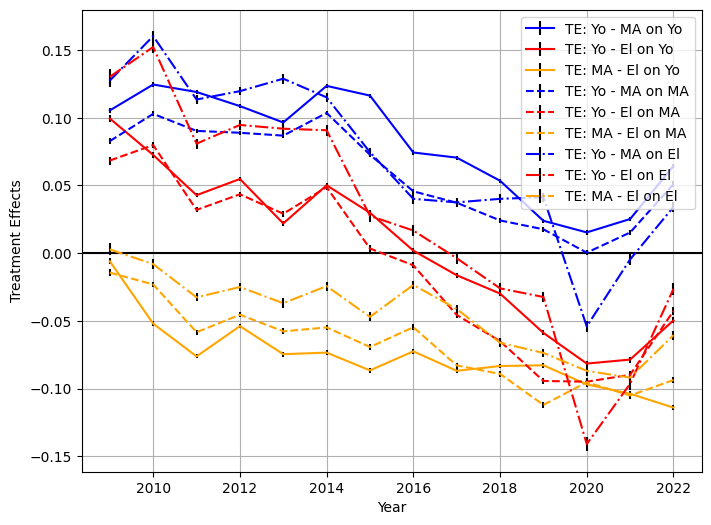

In [27]:
plt.figure(figsize=(8, 6))

# Solid lines with error bars
plt.errorbar(wave_level_df.loc[:, 0], wave_level_df.loc[:, 1], yerr=wave_level_df.loc[:, 2], color='b', ecolor='black', label='TE: Yo - MA on Yo')
plt.errorbar(wave_level_df.loc[:, 0], wave_level_df.loc[:, 3], yerr=wave_level_df.loc[:, 4], color='r', ecolor='black', label='TE: Yo - El on Yo')
plt.errorbar(wave_level_df.loc[:, 0], wave_level_df.loc[:, 5], yerr=wave_level_df.loc[:, 6], color='orange', ecolor='black', label='TE: MA - El on Yo')

# Dashed lines with error bars
plt.errorbar(wave_level_df.loc[:, 0], wave_level_df.loc[:, 7], yerr=wave_level_df.loc[:, 8], color='b', linestyle='--', ecolor='black', label='TE: Yo - MA on MA')
plt.errorbar(wave_level_df.loc[:, 0], wave_level_df.loc[:, 9], yerr=wave_level_df.loc[:, 10], color='r', linestyle='--', ecolor='black', label='TE: Yo - El on MA')
plt.errorbar(wave_level_df.loc[:, 0], wave_level_df.loc[:, 11], yerr=wave_level_df.loc[:, 12], color='orange', linestyle='--', ecolor='black', label='TE: MA - El on MA')

# Dash-dot lines with error bars
plt.errorbar(wave_level_df.loc[:, 0], wave_level_df.loc[:, 13], yerr=wave_level_df.loc[:, 14], color='b', linestyle='-.', ecolor='black', label='TE: Yo - MA on El')
plt.errorbar(wave_level_df.loc[:, 0], wave_level_df.loc[:, 15], yerr=wave_level_df.loc[:, 16], color='r', linestyle='-.', ecolor='black', label='TE: Yo - El on El')
plt.errorbar(wave_level_df.loc[:, 0], wave_level_df.loc[:, 17], yerr=wave_level_df.loc[:, 18], color='orange', linestyle='-.', ecolor='black', label='TE: MA - El on El')

plt.axhline(y=0, color='black', linestyle='-', linewidth=1.5)
plt.ylabel('Treatment Effects')
plt.xlabel('Year')
plt.grid(True)
plt.legend()
plt.savefig('Figures/TemporalVariationTE_Error.jpg', format='jpg', dpi=300, bbox_inches='tight')
plt.show()